In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
divers = pd.read_csv('deepest-diving-animals.csv')
divers #display the dataframe

,animal,category,depth
0,Emperor Penguin,penguins,564
1,King Penguin,penguins,343
2,Rockhopper Penguin,penguins,104
3,Macaroni Penguin,penguins,154
4,Royal Penguin,penguins,226
...,...,...,...
113,Northern Sea Otter,sea otters,97
114,Southern Sea Otter,sea otters,88
115,Atlantic Walrus,walruses,500
116,Dugong,other marine mammals,33


This dataset contains the deepest recorded depths for 118 animals across a variety of categories.

In [ ]:
#Count the number of animals in each category.
print(divers['category'].value_counts())

category
other seabirds          45
seals                   24
penguins                14
toothed whales          14
baleen whales            7
sea lions                5
turtles                  4
sea otters               2
other marine mammals     2
walruses                 1
Name: count, dtype: int64

In [ ]:
# Show the maximum dive depth for each animal category
max_depths = divers.groupby('category')['depth'].max()
max_depths #display the result

category
baleen whales            616
other marine mammals      33
other seabirds           152
penguins                 564
sea lions                597
sea otters                97
seals                   2389
toothed whales          2992
turtles                 1344
walruses                 500
Name: depth, dtype: int64

In [ ]:
#Turn the series into a dataframe.
df = max_depths.reset_index(name='max_depth')
df #display the results

,category,max_depth
0,baleen whales,616
1,other marine mammals,33
2,other seabirds,152
3,penguins,564
4,sea lions,597
5,sea otters,97
6,seals,2389
7,toothed whales,2992
8,turtles,1344
9,walruses,500


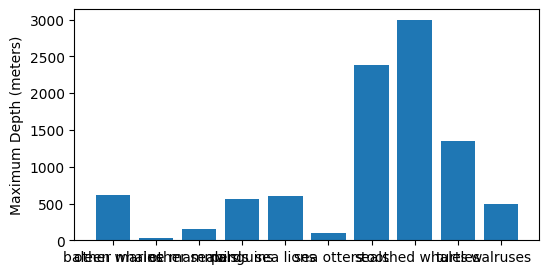

In [ ]:
#Plot a bar chart of the max depth per category
plt.bar(df['category'], df['max_depth'])
plt.ylabel('Maximum Depth (meters)')
plt.show()

The main issue is the overlapping x-axis labels. 

The first issue to overcome is the overlapping text. There are multiple ways to deal with this, such as rotating, shortening or modifying the layout of the labels.

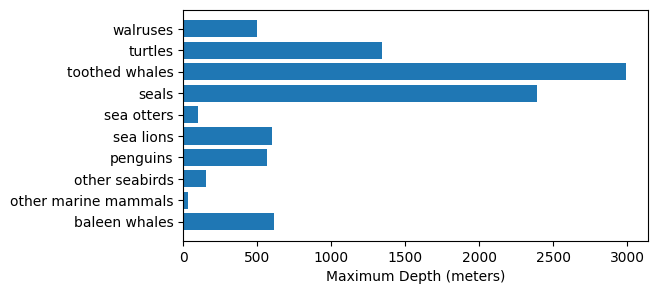

In [ ]:
#Create a horizontal bar
plt.barh(df['category'], df['max_depth'])
plt.xlabel('Maximum Depth (meters)')
plt.show()

We can improve the readability of the graph even more.

Currently the bars aren't in any logical order.

In [ ]:
#Sort max_depth values.
df = df.sort_values('max_depth')
df  #display it

,category,max_depth
1,other marine mammals,33
5,sea otters,97
2,other seabirds,152
9,walruses,500
3,penguins,564
4,sea lions,597
0,baleen whales,616
8,turtles,1344
6,seals,2389
7,toothed whales,2992


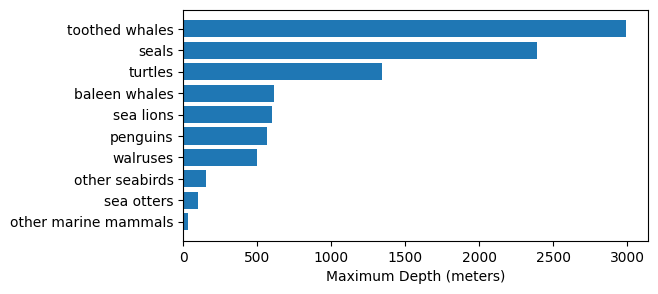

In [ ]:
 # Plot horizontal bar chart of categories vs. max depth 
plt.barh(df['category'], df['max_depth'])
plt.xlabel('Maximum Depth (meters)')
plt.show() 

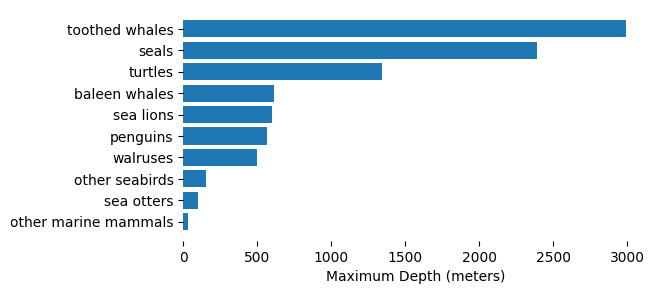

In [ ]:
#Swap ticks and spines for faded grid lines
plt.figure(figsize=(6, 3))
plt.barh(df['category'], df['max_depth'])
plt.xlabel('Maximum Depth (meters)')

ax = plt.gca()
ax.spines[['top','bottom','left','right']].set_visible(False)

plt.show()  

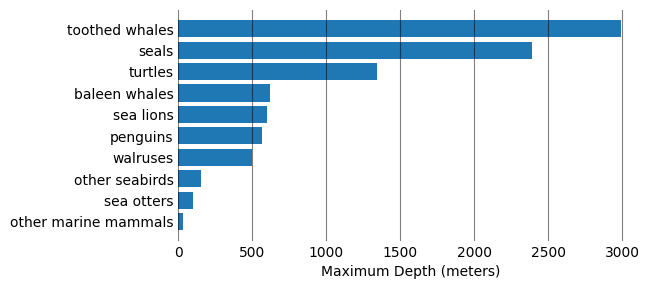

In [ ]:
#Format and style the bar chart
plt.barh(df['category'], df['max_depth'])
plt.xlabel('Maximum Depth (meters)')

ax = plt.gca() # get current axis
ax.spines[['top','bottom','left','right']].set_visible(False)
ax.grid(axis='x', color='black', alpha=0.5)
ax.tick_params(axis='both', length=0)
plt.show()

In [ ]:
#Define helper function to clean bar chart axes
def clean_bar_axes( ):
	ax = plt.gca() # get current axis
	ax.spines[['top','bottom','left','right']].set_visible(False)
	ax.grid(axis='x', color='black', alpha=0.5)
	ax.tick_params(axis='both', length=0)

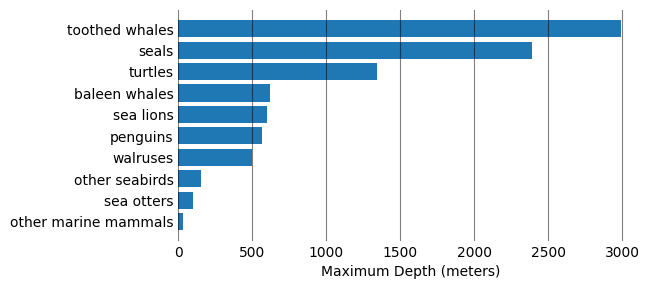

In [ ]:
# Plot horizontal bar chart with custom clean axes
plt.figure(figsize=(6, 3))
plt.barh(df['category'], df['max_depth'])
plt.xlabel('Maximum Depth (meters)')
clean_bar_axes()
plt.show()

In [ ]:
# Adding a Reference Row
df['color'] = 'C0'
df #display it

,category,max_depth,color
1,other marine mammals,33,C0
5,sea otters,97,C0
2,other seabirds,152,C0
9,walruses,500,C0
3,penguins,564,C0
4,sea lions,597,C0
0,baleen whales,616,C0
8,turtles,1344,C0
6,seals,2389,C0
7,toothed whales,2992,C0


In [ ]:
# Adding a reference row for the "submarine implosion" depth of 730 meters using a color of C1.
df.loc['ref_0'] = ['submarine implosion', 730, 'C1']
df = df.sort_values('max_depth')
df #display it"

,category,max_depth,color
1,other marine mammals,33,C0
5,sea otters,97,C0
2,other seabirds,152,C0
9,walruses,500,C0
3,penguins,564,C0
4,sea lions,597,C0
0,baleen whales,616,C0
ref_0,submarine implosion,730,C1
8,turtles,1344,C0
6,seals,2389,C0


This shows that there are only 3 categories that go deeper than our reference depth.

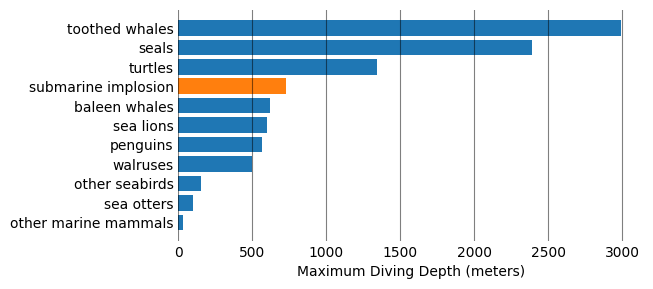

In [ ]:
#Plotting with color
plt.figure(figsize=(6, 3))
plt.barh(df['category'], df['max_depth'], color=df['color'])
plt.xlabel('Maximum Diving Depth (meters)')
clean_bar_axes()
plt.show()
